# Exercise 1
*Do the exercise in the respective CLU learning unit. Get the right k and print the classification vector.*

### Import der Daten
Zunächst werden die Daten importiert. Hierfür wurde eine .csv erstellt und auf GitHub hochgeladen. Der Datensatz enthält insgesamt 100 Vectoren mit jeweils 2 Werten.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
 
data = pd.read_csv(r"https://raw.githubusercontent.com/Fleija/data-science/main/Exercise%2012/dataset.csv")

data

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216
...,...,...,...
95,5.240474,2.983800,5.104915
96,-1.675543,3.780111,-8.060940
97,2.979751,10.772783,-10.093143
98,-5.154519,5.976515,2.794622


### Zeichnen des Graphen
Zunächst sollen die Punkte in ein dreidimensionales Koordinatensystem eingetragen werden, um diese zu visualisieren und sich diese verbildlichen zu können.

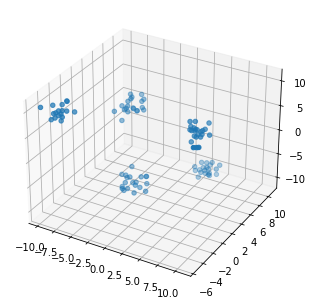

In [2]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data['V1'], data['V2'], data['V3'])

### k bestimmen
Da es sich hier um ein Intrinsic dataset handelt, wissen wir nicht welches k für den Datensatz am besten ist. Durch das Zeichnen des Graphen und dessen möglichen Clustermittelpunkten können wir bestimmen welches k für die weitere Verarbeitung genutzt werden sollte. Hierfür wird eine Funktion definiert, welche eine Variable k annimmt und diese nutzt, um k Clusterzentren zu bestimmen. Die so bestimmten zentren werden dann wie im Script erklärt gemeinsam mit den Punktwolken gezeichnet, um diese in Relation zu stellen.

In [3]:
def plotting(k):
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    C = km.cluster_centers_

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(data['V1'], data['V2'], data['V3'])
    ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='orange', s=100)

Anschließend werden mögliche Werte für k getestet. In diesem Fall alle k von 1 bis 8.

### k = 1

C:\Users\strat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


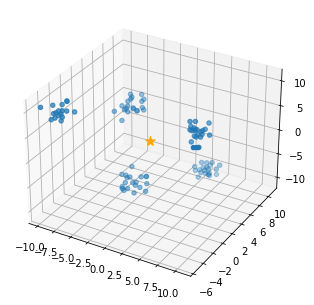

In [4]:
plotting(1)

### k = 2

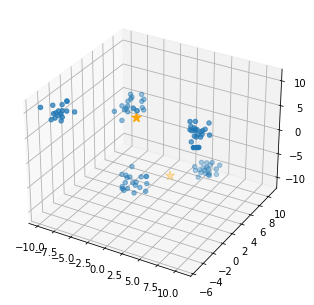

In [5]:
plotting(2)

### k = 3

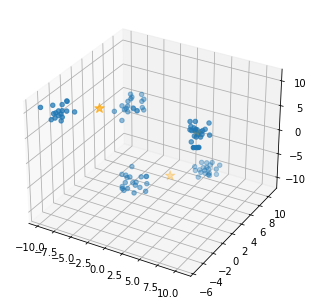

In [6]:
plotting(3)

### k = 4

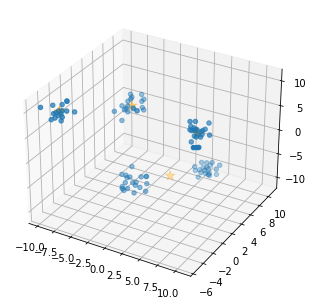

In [7]:
plotting(4)

### k = 5

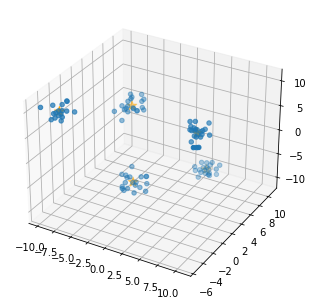

In [8]:
plotting(5)

### k = 6

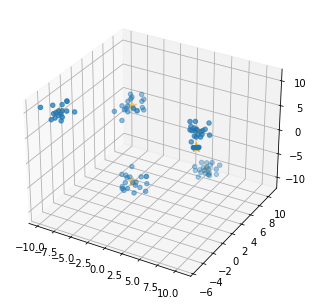

In [9]:
plotting(6)

### k = 7

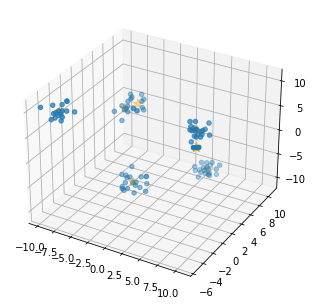

In [10]:
plotting(7)

### k = 8

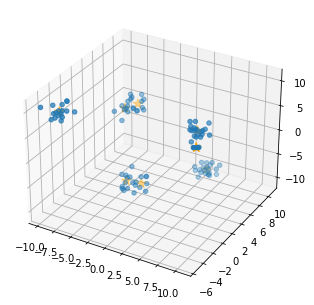

In [11]:
plotting(8)

### A) Best k
Aus den gezeichneten Graphen geht hervor, dass k = 5 genutzt werden sollte, da hier bei einem k größer 5 zwar die Genauigkeit zunimmt, jedoch keinen umfassenden Mehrwert mehr bringt, da die Punktwolken damit nur weiter unterteilt werden. Um den sogenannten Elbow Effect zu umgehen, sollte daher ein k gewählt werden, welches die Ergebnisse im Vergleich zu k-1 signifikant verbessert. Dies ist bei k = 5 gegeben. Im Folgenden wird daher mit k = 5 gearbeitet.

### Nearest Neighbor
Um herauszufinden welcher Punkt zu welchem Cluster gehört, soll nun zunächst eine Funktion definiert werden, welche es ermöglicht den zu dem Punkt point am dichtesten gelegenen Clustermittelpunkt zu finden. Dies wird mit der Funktion neighbor umgesetzt, welche die Euklidische Abstandsfunktion nutzt, um die Distanz zwischen zwei Punkten zu bemessen. Ist die gemessene Distanz kleiner als die zuvor erhaltene, so wird diese als derzeit dichtester Nachbar definiert.

In [12]:
from sklearn.metrics.pairwise import euclidean_distances

def neighbor(point):
    current_point = C[0];
    for center in C:
        if(euclidean_distances([point], [center]) < euclidean_distances([point], [current_point])):
            current_point = center
    return current_point

Im Anschluss daran wird eine Funktion definiert, die den Index eines erhaltenen Nachbarn aus findig machen kann. Hierfür wird der gesuchte Punkt mit den Clustermittelpunkten verglichen und die Clusternummer zurückgegeben.

In [13]:
def getK(point):
    count = 1;
    for c in C:
        if(c[0] == point[0]):
            if(c[1] == point[1]):
                if(c[2] == point[2]):
                    return count
        count = count + 1

Beide Funktionen können nun dafür genutzt werden, um den einzelnen Punkten die Cluster zuzuordnen. Zuvor werden noch einmal die Clustermittelpunkte mit k = 5 definiert.

In [14]:
km = KMeans(n_clusters=5)
km = km.fit(data)
C = km.cluster_centers_
C

array([[ 3.66536804,  8.91074968, -9.06579829],
       [-5.10691526,  5.60179825,  3.71956936],
       [ 6.47155208,  2.70446035,  5.19967608],
       [-8.53242046, -3.55401526,  8.96857685],
       [-2.40331671,  2.14752865, -8.02378894]])

### B) Clustering Vectors
Somit ergeben sich die folgenden clustering vectors:

In [15]:
for i, row in data.iterrows():
    print("Punkt", i+1," [",row[0],",",row[1],",",row[2],"] gehört zu Cluster", getK(neighbor([row[0],  row[1],  row[2]])))

Punkt 1  [ -5.34023562 , 4.7472463 , 3.82332607 ] gehört zu Cluster 2
Punkt 2  [ -9.58706542 , -3.43446551 , 9.70183939 ] gehört zu Cluster 4
Punkt 3  [ -8.38501223 , -3.90279369 , 8.51462008 ] gehört zu Cluster 4
Punkt 4  [ 5.7082258 , 2.65857479 , 5.40448245 ] gehört zu Cluster 3
Punkt 5  [ -7.43166517 , -4.39025105 , 9.00321635 ] gehört zu Cluster 4
Punkt 6  [ 5.028509 , 9.04769521 , -8.54843651 ] gehört zu Cluster 1
Punkt 7  [ 6.37219562 , 4.45994039 , 4.36935755 ] gehört zu Cluster 3
Punkt 8  [ -8.35525163 , -3.51695636 , 7.16271385 ] gehört zu Cluster 4
Punkt 9  [ -3.40526552 , 2.28142739 , -7.63117179 ] gehört zu Cluster 5
Punkt 10  [ 5.62156138 , 3.43105644 , 4.66657363 ] gehört zu Cluster 3
Punkt 11  [ -8.84016412 , -3.81234109 , 8.80786358 ] gehört zu Cluster 4
Punkt 12  [ -4.61692581 , 2.83368789 , -7.96289974 ] gehört zu Cluster 5
Punkt 13  [ 4.94946903 , 3.57706667 , 5.14013488 ] gehört zu Cluster 3
Punkt 14  [ 3.70343606 , 8.61137549 , -9.59257599 ] gehört zu Cluster 1
Pu